In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_parquet('../datasets/final.parquet')

In [4]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
index,,,,,,,,,,,,,,,,,,,,,,
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


## Get basic data info:
* check nulls
* check data types
* drop columns (if necessary)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191331 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1191331 non-null  int64  
 1   DAY_OF_WEEK            1191331 non-null  int64  
 2   OP_UNIQUE_CARRIER      1191331 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64  
 4   OP_CARRIER             1191331 non-null  object 
 5   TAIL_NUM               1188090 non-null  object 
 6   OP_CARRIER_FL_NUM      1191331 non-null  int64  
 7   ORIGIN_AIRPORT_ID      1191331 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int64  
 9   ORIGIN                 1191331 non-null  object 
 10  DEST_AIRPORT_ID        1191331 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    1191331 non-null  int64  
 12  DEST                   1191331 non-null  object 
 13  DEP_TIME               1168315 non-null  float64
 14  DEP_DEL15              1

From the memory usage of the df and also the the type of data we can change int64 and float64 to their lower bits so we can use less memory 

In [4]:
int32_data = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32)
float32_data = dict.fromkeys(df.select_dtypes(np.float64).columns, np.float32)
df = df.astype(int32_data)
df = df.astype(float32_data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191331 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1191331 non-null  int32  
 1   DAY_OF_WEEK            1191331 non-null  int32  
 2   OP_UNIQUE_CARRIER      1191331 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1191331 non-null  int32  
 4   OP_CARRIER             1191331 non-null  object 
 5   TAIL_NUM               1188090 non-null  object 
 6   OP_CARRIER_FL_NUM      1191331 non-null  int32  
 7   ORIGIN_AIRPORT_ID      1191331 non-null  int32  
 8   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int32  
 9   ORIGIN                 1191331 non-null  object 
 10  DEST_AIRPORT_ID        1191331 non-null  int32  
 11  DEST_AIRPORT_SEQ_ID    1191331 non-null  int32  
 12  DEST                   1191331 non-null  object 
 13  DEP_TIME               1168315 non-null  float32
 14  DEP_DEL15              1

In [6]:
df.drop(columns=['Unnamed: 21'], inplace=True)
# since where we are going to predict the departure delay, we can drop the arrival delay
df.drop(columns=['ARR_DEL15'], inplace=True)

In [39]:
df['DEP_DEL15'].value_counts()

DEP_DEL15
0.0    987466
1.0    180811
Name: count, dtype: int64

In [7]:
# check if NaN in DEP_DEL15
df[df['DEP_DEL15'].isna()]

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE
index,,,,,,,,,,,,,,,,,,,,
397,1,2,AA,19805,AA,N965NN,178,14027,1402702,PBI,13930,1393007,ORD,NaN,NaN,0600-0659,NaN,1.0,0.0,1143.0
403,1,2,AA,19805,AA,N9015D,189,11503,1150305,EGE,11298,1129806,DFW,NaN,NaN,0700-0759,NaN,1.0,0.0,721.0
1973,1,2,EV,20366,EV,N17984,4187,12448,1244807,JAN,12266,1226603,IAH,NaN,NaN,0900-0959,NaN,1.0,0.0,351.0
1975,1,2,EV,20366,EV,N17984,4189,12266,1226603,IAH,12448,1244807,JAN,NaN,NaN,0700-0759,NaN,1.0,0.0,351.0
1976,1,2,EV,20366,EV,N16561,4190,12266,1226603,IAH,11481,1148102,ECP,NaN,NaN,1900-1959,NaN,1.0,0.0,572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601038,31,5,HA,19690,HA,None,255,13830,1383002,OGG,12173,1217305,HNL,NaN,NaN,1200-1259,NaN,1.0,0.0,100.0
601479,31,5,AA,19805,AA,N751UW,2877,10599,1059904,BHM,11298,1129806,DFW,NaN,NaN,0700-0759,NaN,1.0,0.0,597.0
603963,31,5,B6,20409,B6,N943JT,498,14747,1474703,SEA,10721,1072102,BOS,NaN,NaN,2300-2359,NaN,1.0,0.0,2496.0


In [8]:
# when cancelled, DEP_DEL15 is NaN
# drop rows where CANCELLED == 1
df = df[df['CANCELLED'] == 0]

In [16]:
# change DEP_DEL15 from float to int
df['DEP_DEL15'] = df['DEP_DEL15'].astype(int)

In [9]:
df.isna().sum()

DAY_OF_MONTH               0
DAY_OF_WEEK                0
OP_UNIQUE_CARRIER          0
OP_CARRIER_AIRLINE_ID      0
OP_CARRIER                 0
TAIL_NUM                   0
OP_CARRIER_FL_NUM          0
ORIGIN_AIRPORT_ID          0
ORIGIN_AIRPORT_SEQ_ID      0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST_AIRPORT_SEQ_ID        0
DEST                       0
DEP_TIME                   0
DEP_DEL15                  0
DEP_TIME_BLK               0
ARR_TIME                 482
CANCELLED                  0
DIVERTED                   0
DISTANCE                   0
dtype: int64

In [5]:
df.sample(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
index,,,,,,,,,,,,,,,,,,,,,
73716,4,6,AA,19805,AA,N773XF,725,11986,1198603,GRR,14107,1410702,PHX,808.0,1.0,0700-0759,1014.0,0.0,0.0,0.0,1574.0
130095,7,1,WN,19393,WN,N462WN,21,11259,1125904,DAL,12191,1219102,HOU,NaN,NaN,1200-1259,NaN,NaN,1.0,0.0,239.0
176324,10,4,OO,20304,OO,N778SK,2957,11638,1163807,FAT,12892,1289208,LAX,1621.0,0.0,1600-1659,1736.0,0.0,0.0,0.0,209.0
320536,17,4,MQ,20398,MQ,N684JW,4033,13930,1393007,ORD,14633,1463303,RST,840.0,1.0,0800-0859,957.0,1.0,0.0,0.0,268.0
297937,16,4,DL,19790,DL,N328NW,1218,14492,1449202,RDU,11697,1169706,FLL,1132.0,0.0,1100-1159,1329.0,0.0,0.0,0.0,680.0
22897,2,4,DL,19790,DL,N363NB,2687,14869,1486903,SLC,12339,1233904,IND,1724.0,0.0,1700-1759,2220.0,0.0,0.0,0.0,1355.0
11167,1,2,YV,20378,YV,N86309,6150,10423,1042302,AUS,12264,1226402,IAD,1639.0,0.0,1600-1659,2021.0,0.0,0.0,0.0,1297.0
377558,20,1,AA,19805,AA,N342PM,1605,11298,1129806,DFW,14492,1449202,RDU,1826.0,0.0,1800-1859,2146.0,0.0,0.0,0.0,1061.0
436490,23,4,WN,19393,WN,N8309C,5317,13796,1379608,OAK,12892,1289208,LAX,1710.0,0.0,1700-1759,1830.0,0.0,0.0,0.0,337.0


Just looking at the data we can see some correlation between some features.<br>
For example OP_CARRIER appears to be the same as OP_UNIQUE_CARRIER<br>
Also for ORIGIN_AIRPORT_ID and ORIGIN_AIRPORT_SEQ_ID are basically the same. 


## Check features correlation

In [11]:
print(df['OP_CARRIER'].value_counts())
print(df['OP_UNIQUE_CARRIER'].value_counts())

OP_CARRIER
WN    221082
DL    153903
AA    153293
OO    136086
UA     95316
YX     54878
MQ     51899
B6     49152
OH     47478
9E     43266
AS     41854
YV     36182
NK     32699
EV     23759
F9     22114
G4     14537
HA     13833
Name: count, dtype: int64
OP_UNIQUE_CARRIER
WN    221082
DL    153903
AA    153293
OO    136086
UA     95316
YX     54878
MQ     51899
B6     49152
OH     47478
9E     43266
AS     41854
YV     36182
NK     32699
EV     23759
F9     22114
G4     14537
HA     13833
Name: count, dtype: int64


In [12]:
df['OP_CARRIER'].value_counts() == df['OP_UNIQUE_CARRIER'].value_counts()

OP_CARRIER
WN    True
DL    True
AA    True
OO    True
UA    True
YX    True
MQ    True
B6    True
OH    True
9E    True
AS    True
YV    True
NK    True
EV    True
F9    True
G4    True
HA    True
Name: count, dtype: bool

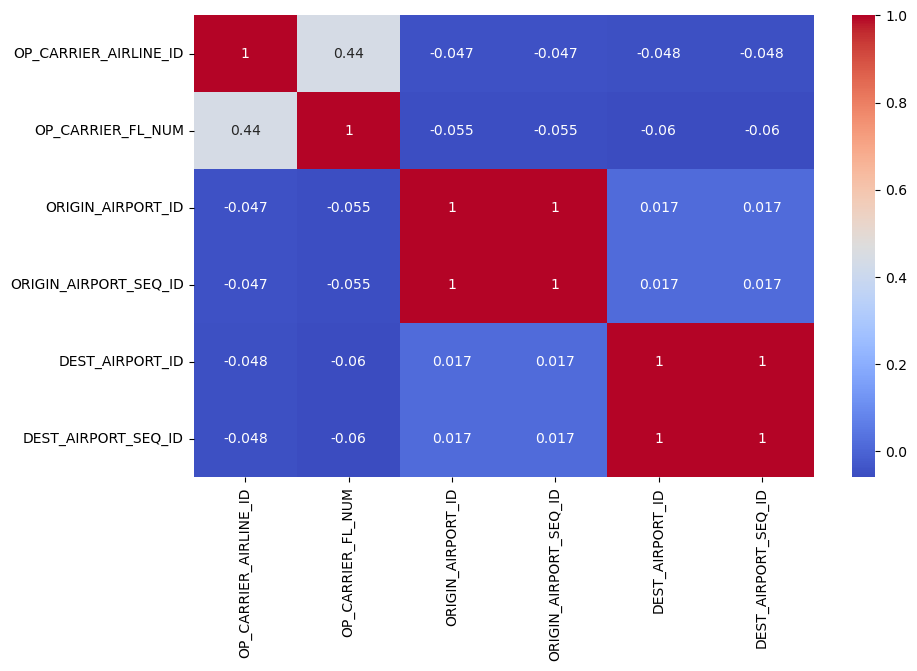

In [13]:
# plot correlation of some features to see if there is any correlation between them
plt.figure(figsize=(10,6))
sns.heatmap(df[['OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 
                    'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID']].corr(), annot=True, cmap='coolwarm')
plt.show()

the plot confirms my initial thoughts of the values been the same, also the data description for the variables is the same.
* DEST_AIRPORT_SEQ_ID == DEST_AIRPORT_ID
* ORIGIN_AIRPORT_SEQ_ID == ORIGIN_AIRPORT_ID

so we can delete some columns to make the data cleaner.

In [10]:
df.drop(columns=['DEST_AIRPORT_SEQ_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'OP_UNIQUE_CARRIER'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167677 entries, 0 to 607345
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1167677 non-null  int32  
 1   DAY_OF_WEEK            1167677 non-null  int32  
 2   OP_CARRIER_AIRLINE_ID  1167677 non-null  int32  
 3   OP_CARRIER             1167677 non-null  object 
 4   TAIL_NUM               1167677 non-null  object 
 5   OP_CARRIER_FL_NUM      1167677 non-null  int32  
 6   ORIGIN_AIRPORT_ID      1167677 non-null  int32  
 7   ORIGIN                 1167677 non-null  object 
 8   DEST_AIRPORT_ID        1167677 non-null  int32  
 9   DEST                   1167677 non-null  object 
 10  DEP_TIME               1167677 non-null  float32
 11  DEP_DEL15              1167677 non-null  float32
 12  DEP_TIME_BLK           1167677 non-null  object 
 13  ARR_TIME               1167195 non-null  float32
 14  CANCELLED              1

In [13]:
df.sample(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE
index,,,,,,,,,,,,,,,,,
55940,3,4,20378,YV,N917FJ,5809,11298,DFW,13158,MAF,936.0,1.0,0800-0859,1100.0,0.0,0.0,309.0
116266,6,1,20409,B6,N821JB,1121,14057,PDX,12954,LGB,550.0,0.0,0600-0659,800.0,0.0,0.0,846.0
239589,13,1,19977,UA,N832UA,1528,12266,IAH,10821,BWI,1148.0,0.0,1100-1159,1513.0,0.0,0.0,1235.0
488225,27,7,20304,OO,N792SK,5296,13342,MKE,12266,IAH,730.0,0.0,0700-0759,1010.0,0.0,0.0,984.0
44806,3,4,20397,OH,N560NN,5248,11057,CLT,15249,TLH,1620.0,0.0,1600-1659,1753.0,0.0,0.0,386.0
429619,23,4,20398,MQ,N613AE,3898,10136,ABI,11298,DFW,1634.0,0.0,1600-1659,1740.0,0.0,0.0,158.0
93555,5,7,20409,B6,N519JB,151,10721,BOS,13204,MCO,1013.0,0.0,1000-1059,1312.0,0.0,0.0,1121.0
512858,27,1,20397,OH,N590NN,5300,14193,PNS,11057,CLT,854.0,0.0,0900-0959,1134.0,0.0,0.0,488.0
252105,13,1,20409,B6,N519JB,514,12954,LGB,12478,JFK,1528.0,0.0,1500-1559,2316.0,0.0,0.0,2465.0


### Predicting flight delays is a complex problem that depends on many factors, some of which can be found in the dataset. 
#### Here are the features I would consider using for the model:

##### Directly useful features:

* Day of Month: Flight delays can vary depending on the time of the month. For example, holidays might have more delays.

* Day of Week: Similar to Day of Month, the day of the week might affect the likelihood of delays. Weekends and Fridays, for example, might have more delays.

* Unique Carrier Code / Airline ID / IATA Code: Some airlines might have better on-time performance than others.

* Flight Number: Some specific flights might have a history of being delayed more often.

* Origin Airport & Destination Airport: Some airports might experience more delays due to factors like air traffic congestion, weather conditions, etc.

* Departure Time Block: The time of the day of the flight can be critical. Flights later in the day might have higher delays due to the "ripple" effect of earlier delays.

* Distance between airports (miles): Longer flights might have different delay characteristics than shorter ones.

In [14]:
df.drop(columns=['TAIL_NUM', 'OP_CARRIER_AIRLINE_ID', 'ARR_TIME', 'CANCELLED', 'DIVERTED'], inplace=True)

### Add carrier names to the dataset

In [22]:
carrier = pd.read_csv('../datasets/carrier_table.csv')

In [23]:
carrier.head()

,Unnamed: 0,IATA Code,ICAO Code,Air Carrier Name
0,0,ZW,AWI,Air Wisconsin
1,1,AS,ASA,Alaska Airlines
2,2,G4,AAY,Allegiant Air LLC
3,3,AA,AAL,American Airlines
4,4,C5,UCA,Champlain Air


In [26]:
## add carrier name to df based on IATA_CODE
df = df.merge(carrier, how='left', left_on='OP_CARRIER', right_on='IATA Code')

In [31]:
# save the final dataset
df.to_parquet('../datasets/clean.parquet')